In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.svm import SVR

In [4]:
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [5]:
print(diabetes_x.shape)
print(diabetes_y.shape)

(442, 10)
(442,)


In [6]:
data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
    diabetes_x, diabetes_y, test_size=0.2, random_state=42)

In [8]:
svr_rbf_malli = SVR(kernel = 'rbf', C=100, gamma=0.1, epsilon=0.1)

In [9]:
svr_rbf_malli.fit(data_x_opetus, data_y_opetus)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
ennustukset_opetus = svr_rbf_malli.predict(data_x_opetus)
opetus_mse = mean_squared_error(data_y_opetus, ennustukset_opetus)
print(opetus_mse)

4407.595174619176


In [18]:
ennustukset_validointi = svr_rbf_malli.predict(data_x_validointi)
validointi_mse = mean_squared_error(data_y_validointi, ennustukset_validointi)
print(validointi_mse)

3784.2801033117785


In [25]:
opetus_mse = np.zeros(10)
opetus_r2 = np.zeros(10)

validointi_mse = np.zeros(10)
validointi_r2 = np.zeros(10)

for i in range(1,10):
    data_x_opetus, data_x_validointi, data_y_opetus, data_y_validointi = train_test_split(
        diabetes_x, diabetes_y, test_size=0.2, random_state=689*i)
    
    svr_rbf_malli.fit(data_x_opetus, data_y_opetus)
    
    ennustukset_opetus = svr_rbf_malli.predict(data_x_opetus)
    opetus_mse[i] = mean_squared_error(data_y_opetus, ennustukset_opetus)
    opetus_r2[i] = r2_score(data_y_opetus, ennustukset_opetus)
    
    ennustukset_validointi = svr_rbf_malli.predict(data_x_validointi)
    validointi_mse[i] = mean_squared_error(data_y_validointi, ennustukset_validointi)
    validointi_r2[i] = r2_score(data_y_validointi, ennustukset_validointi)

In [27]:
print(opetus_mse)
print('\n')
print(np.mean(opetus_mse))

[   0.         4260.30244908 4292.53455754 4298.87872192 4129.23016739
 4241.17543777 4161.91872678 4164.57677808 4484.87079036 4379.69967597]


3841.3187304884386


In [28]:
print(validointi_mse)
print('\n')
print(np.mean(validointi_mse))

[   0.         4040.25444352 4110.86143834 4634.76538309 4421.29420902
 4539.03322981 4570.73526155 4374.53585921 4463.34904257 4163.71226351]


3931.85411306068


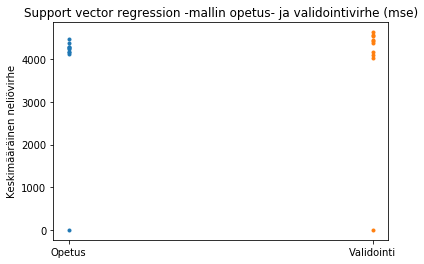

In [26]:
plt.plot(np.ones((10,1)), opetus_mse, '.')
plt.plot(2*np.ones((10,1)), validointi_mse, '.')

plt.title('Support vector regression -mallin opetus- ja validointivirhe (mse)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Keskimääräinen neliövirhe')

plt.show()

In [29]:
print(opetus_r2)
print('\n')
print(np.mean(opetus_r2))

[0.         0.30215687 0.27292372 0.27056671 0.30314369 0.27670941
 0.28845823 0.30262703 0.24192201 0.26144924]


0.2519956897640313


In [30]:
print(validointi_r2)
print('\n')
print(np.mean(validointi_r2))

[0.         0.22641044 0.31332736 0.22320362 0.25600862 0.26620163
 0.26865444 0.24090881 0.24930501 0.29771116]


0.23417310897077823


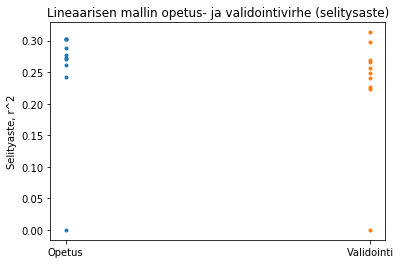

In [31]:
plt.plot(np.ones((10,1)), opetus_r2, '.')
plt.plot(2*np.ones((10,1)), validointi_r2, '.')

plt.title('Lineaarisen mallin opetus- ja validointivirhe (selitysaste)')
plt.xticks([1,2], ['Opetus', 'Validointi'])
plt.ylabel('Selityaste, r^2')

plt.show()